### General steps to prepare data for xspec
    1) get complete_df with flags removed
    2) shift tus array in dataframe by tshift provided by cross_corrolate(). NOTE: ADDED to tus_ASIM
    3) use keV_bin() for binning of the energies
    4) change format of dataframe with this command: pd.set_option('display.float_format', '{:.6E}'.format)
    5) export to txt file with command: np.savetxt(r'/Users/andreas/phys/master/GRB/spectral_analysis/GRB190206A_keV_histogram.txt"',df_keV.values, delimiter=',', header='bins_keV,counts,poisson_error_counts,duration_seconds', fmt='%.6E')



In [61]:
%run /Users/andreas/phys/master/GRB/src/ASIMXpec.ipynb #MAC
#%run /Home/siv30/wad005/master/GRB/src/ASIMXspec.ipynb #UiB
pd.set_option('display.float_format', '{:.6E}'.format)

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!
All MAC paths are set!
read_matlab_file.ipynb loaded successfully!
All MAC paths are set!
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!
All MAC paths are set!
read_matlab_file.ipynb loaded successfully!
All MAC paths are set!
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!
safety_time.ipynb loaded successfully!
LC_calibration loaded successfully!


## ASIM

In [62]:
ASIM_df, T0_ASIM = complete_df(grb_id="GRB201227",remove_flag=True)
tus = ASIM_df["tus"].to_numpy()
print(T0_ASIM)

Creating df for short GRB
Absolute time correction subtracted from T0
35 valleys removed
erg converted to keV
df sorted by adr and tus
safety time events flagged. Found 42 flags
Removed 42 flags from df
df sorted by tus
2020-12-27 15:14:06.853667


tus array OK ...


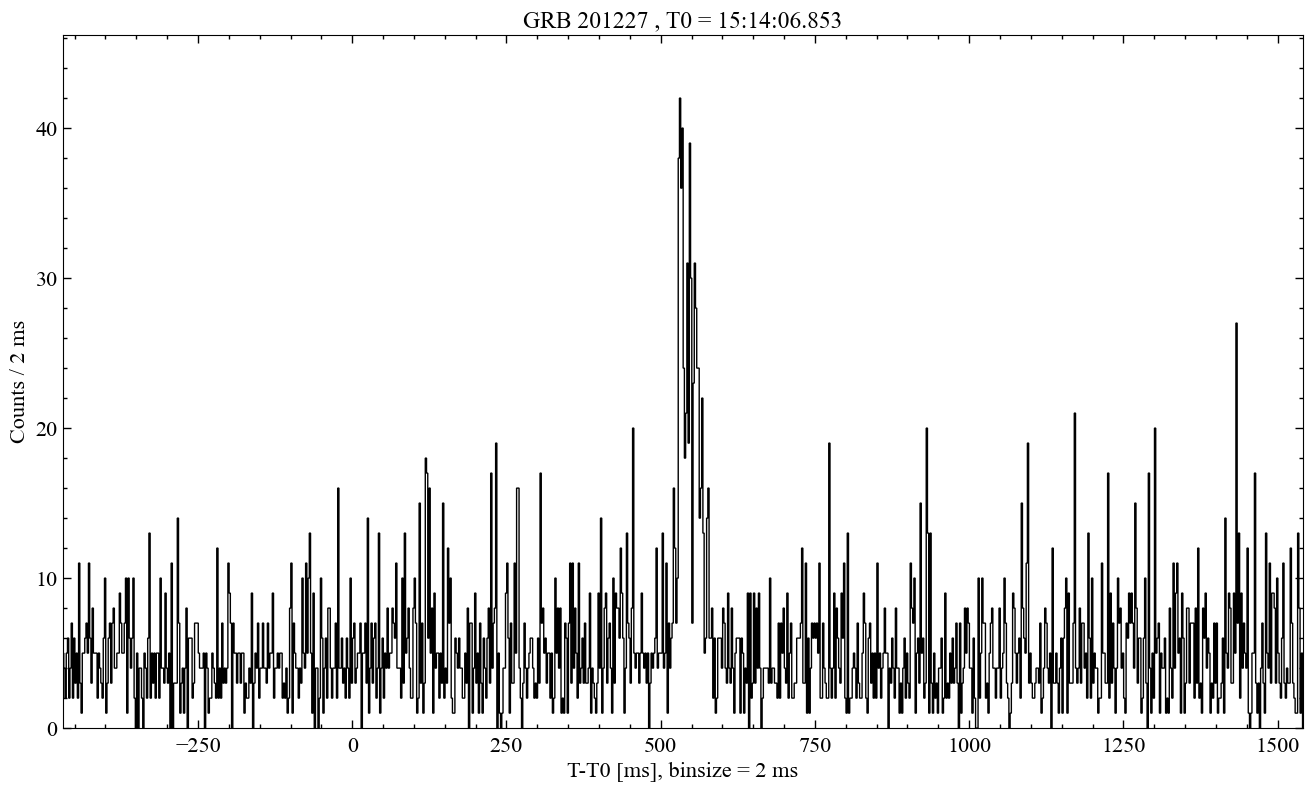

In [60]:
plot_HED(tus_arr=tus,T0=T0_ASIM,binsize=2)

## CrossCorr validation

In [135]:
ASIM_df.head()

,tus,erg,typ,adr,dau,det,keV,cal_abc,st,dt,flag
1,-4.696283E+05,44,0,8,3,2,1.239455E+03,"-0.006079, 29.0395, -26.5145",1.159636E+00,NAN,False
0,-4.696283E+05,27,0,2,1,2,5.542465E+02,"-0.0018329999999999998, 20.5554, 0.586966",1.108493E+00,NAN,False
3,-4.692382E+05,1595,0,4,2,1,2.723717E+04,"0.006808, 6.1533, 102.9379",2.300000E+01,NAN,False
2,-4.692382E+05,1805,0,3,1,3,2.857945E+04,"0.002741, 10.8712, 26.6903",2.300000E+01,NAN,False
4,-4.689625E+05,167,0,8,3,2,4.653545E+03,"-0.006079, 29.0395, -26.5145",3.614179E+00,6.657500E+02,False


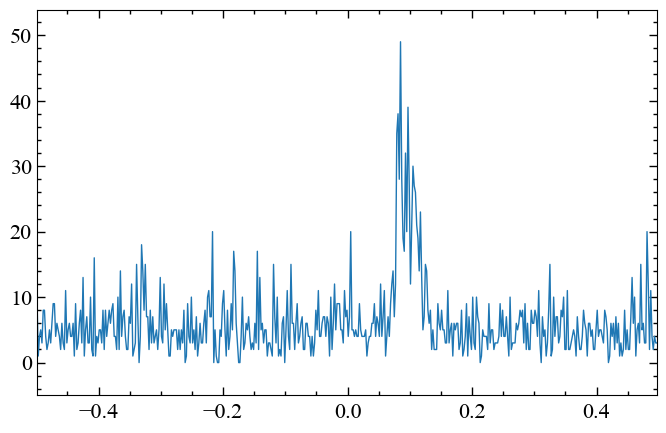

In [165]:
tus = ASIM_df["tus"].to_numpy(dtype=np.float32)/1e6
laggApprox = -0.45
tus += laggApprox
tus = tus[find_nearest(tus,-0.5):find_nearest(tus,0.5)]
lc1 = LC.make_lightcurve(toa=tus,dt=0.002)
lc1.plot()

# KW

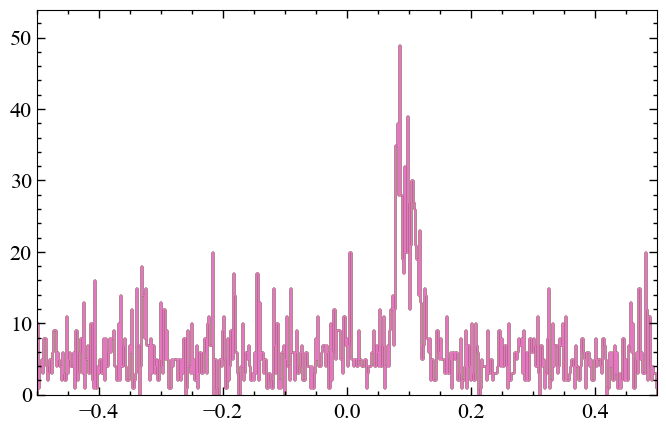

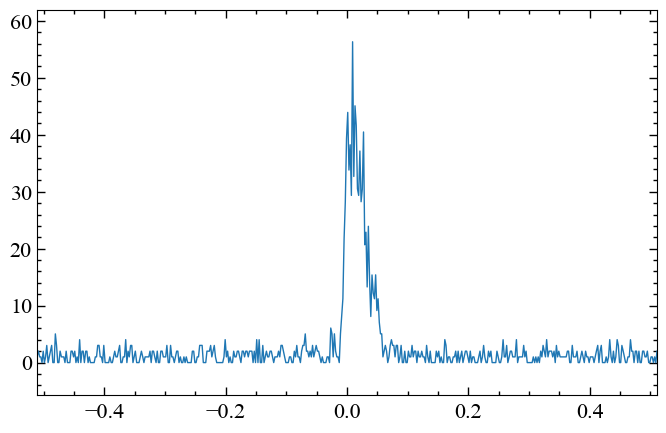

In [196]:
kw_filename = "GRB201227A_2ms.txt"
kw_file = kw_lc_path + kw_filename
binsize=0.002
kw_df = pd.read_csv(kw_file,sep='\s+')
kw_bin_lo,kw_bin_hi,G2,G3= kw_df["Ti"].to_numpy(dtype=np.float16), kw_df["Tf"].to_numpy(dtype=np.float16), kw_df["G2"].to_numpy(dtype=np.float16), kw_df["G3"].to_numpy(dtype=np.float16)

kw_dt = np.round(np.diff(kw_bin_lo),3)
i_stop_kw = np.where(kw_dt>binsize)[0][0]

kw_bin_lo, kw_bin_hi, G2, G3 = kw_bin_lo[:i_stop_kw], kw_bin_hi[:i_stop_kw], G2[:i_stop_kw], G3[:i_stop_kw]
kwCounts = G2+G3
kw_lc = LC(time=kw_bin_lo + binsize/2, counts=kwCounts, skip_checks=True,dt=binsize)
kw_lc.plot()

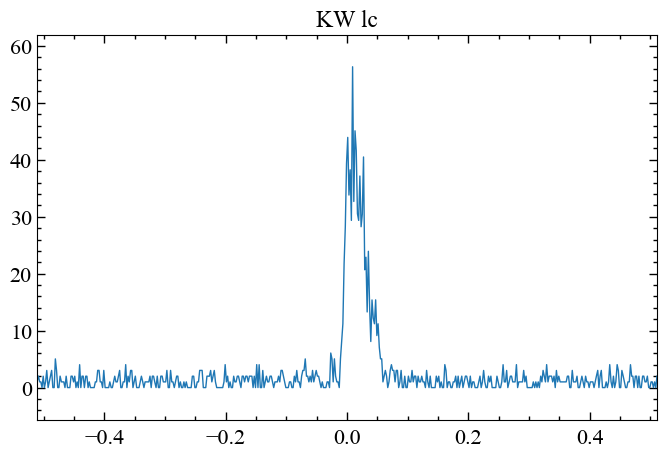

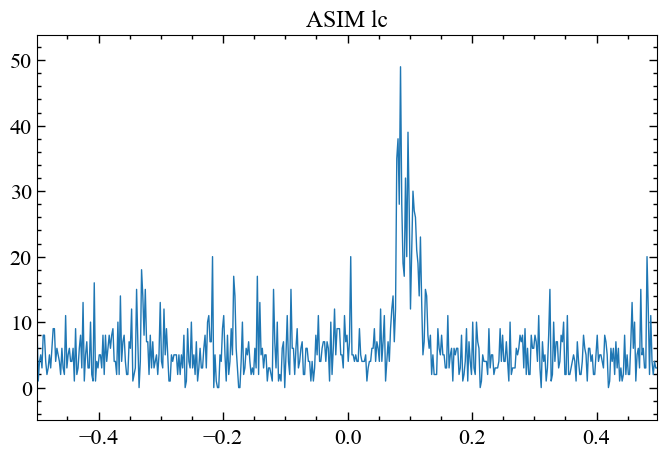

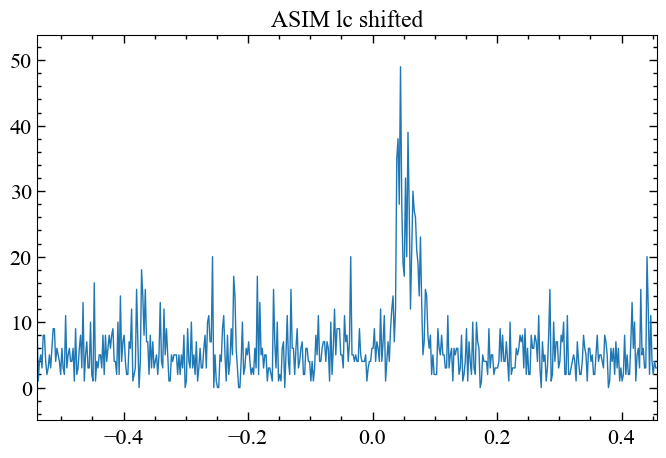

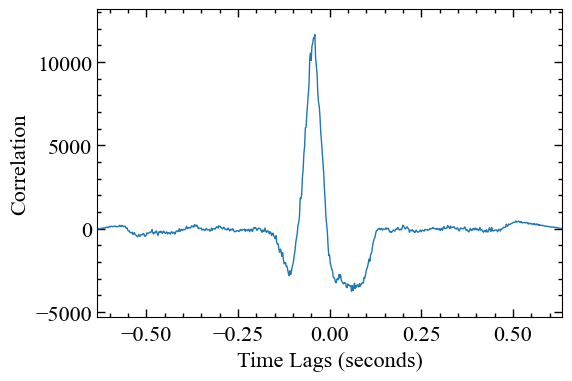

tshift (s)  -0.04  tshift returned as s


In [169]:
CC = CrossCorrelation(asim_lc,kw_lc,mode="full")
tlagg = np.round(CC.cal_timeshift(dt=0.002)[0],6)
lc1Shifted = lc1.shift(CC.time_shift) #t_shift is added to lightcurve. Checked in source code

#Plotting ---------------------------------

kw_lc.plot(title="KW lc")
lc1.plot(title="ASIM lc")
lc1Shifted.plot(title="ASIM lc shifted")
CC.plot(labels = ['Time Lags (seconds)','Correlation'])

print("tshift (s) ", tlagg, " tshift returned as s")

In [171]:
from scipy.signal import correlate as CR

In [195]:
hist = plt.hist(tus,bins = np.arange(min(tus),max(tus) + 0.002,0.002),histtype="step")
#plt.bar(edges[:-1],hist,align="edge",edgecolor= "black")
n,bins= hist[0],hist[1]

In [211]:
cr = CR(n,kwCounts,method="auto")

In [210]:
kwCounts.shape

(512,)

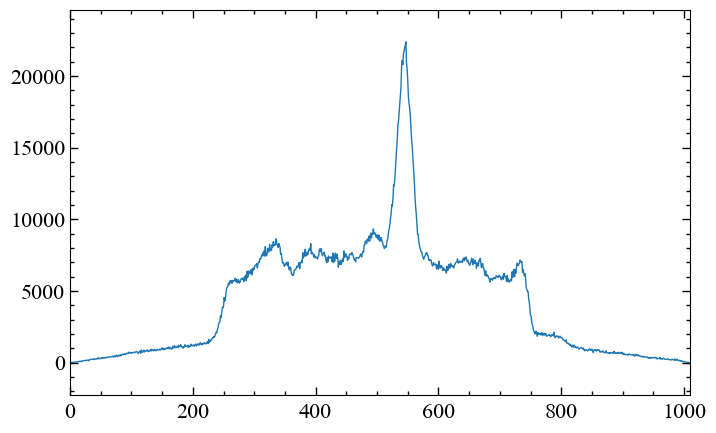

In [212]:
plt.plot(cr)
plt.show()